# Monte Carlo simulation of low energy gamma rays passing through a medium

Monte Carlo simulation of low energy gamma rays passing through a medium
Created on Mon Jun 17 22:11:48 2019 by Marco Citossi 

<h2>Gamma Spectroscopy</h2>
 
In 1895 the radioactivity was discovered by H. Becquerel and in 1903 the Nobel Prize in Physics was assigned to Curie spouses for their studies on these phenomena. </br>
Radioactivity is around us and getting to know it experimentally is essential for physics students.<br>
When an unstable nucleus decays in a cascade leading to a stable nuclide, it emits α or β or γ quanta or a combination of them. <br>
Gamma rays are high energy photons and the spectroscopy of the emitted γ rays is instrumental for understanding the mechanism of the interaction with matter, the fundamentals about detection and the underlying nuclear physics. <br>
Moreover, it is relevant in basic and applied fields of science and technology, from nuclear to medical physics, from archeometry to homeland security.



In [10]:
import monfgp
import monfgc
import monfsgc
import monfsgp
import math
import numpy as np
import matplotlib.pyplot as plt
import time as time
import ipywidgets as ipw
from IPython.display import display

w_text = ipw.Text(description="Value", value="Change here")
w_button = ipw.Button(description="Click me")
w_label = ipw.Label(value="Initial text")
w_slider = ipw.FloatSlider(
description="Density of the medium",
value=3, min=1, max=7)
display(w_text, w_button, w_label, w_slider)
display(w_slider)


print("Loading approximation data for various cross sections...")
MesCr = np.loadtxt('sef.txt')
falphaZ=MesCr[:,0]
fb0=MesCr[:,1]
fb1=MesCr[:,2]
fb2=MesCr[:,3]
ffaZ=MesCr[:,4]
print("Loaded approximation data.")

Text(value='Change here', description='Value')

Button(description='Click me', style=ButtonStyle())

Label(value='Initial text')

FloatSlider(value=3.0, description='Density of the medium', max=7.0, min=1.0)

FloatSlider(value=3.0, description='Density of the medium', max=7.0, min=1.0)

Loading approximation data for various cross sections...
Loaded approximation data.


In [ ]:
print("Medium properties:")
mat = input("Enter material of the medium ('NaI' or 'Other'): ")
rho = float(input("Enter density of the medium: "))
neq = int(input("Enter no of elements per molecule or compound: "))

nam = [0]*neq
ZA = [0]*neq
A=[0]*neq
alphaZ=[0]*neq
b0 = [0]*neq
b1 = [0]*neq
b2 = [0]*neq
faZ = [0]*neq

for n in range(neq):
    nam[n] = int(input("\nEnter number of atoms per molecule of element {0}:".format(n+1)))
    ZA[n] = int(input("Enter ZA of element {0}:".format(n+1)))
    A[n] = int(input("Enter A of element {0}:".format(n+1)))
    if mat == 'NaI':
        flag = 0
    else:
        print("Element %d \n %d atoms; Z = %d A = %d \n", n+1, nam(n), ZA(n), A(n)) 
        
    alphaZ[n]=ZA[n]/137.036
    for j in range(14):
        if (alphaZ[n] >= falphaZ[j] and alphaZ[n] < falphaZ[j+1]):
            b0[n]=((fb0[j+1]-fb0[j])/(falphaZ[j+1]-falphaZ[j]))*(alphaZ[n]-falphaZ[j])+fb0[j]
            b1[n]=((fb1[j+1]-fb1[j])/(falphaZ[j+1]-falphaZ[j]))*(alphaZ[n]-falphaZ[j])+fb1[j]
            b2[n]=((fb2[j+1]-fb2[j])/(falphaZ[j+1]-falphaZ[j]))*(alphaZ[n]-falphaZ[j])+fb2[j]
            faZ[n]=((ffaZ[j+1]-ffaZ[j])/(falphaZ[j+1]-falphaZ[j]))*(alphaZ[n]-falphaZ[j])+ffaZ[j]
            break

Medium properties:


In [3]:
if mat == 'NaI':
    print("NaI (Accurate cross section are used for NaI)")
else:    
    print("Material = %s \n density = %3.1f g/cm**3 \n molecule consisting of %d elements\n",mat,rho,neq)

print("\n")
print("Medium properties:\n")
print("Medium Geometry:")

geo_flag = 1
while geo_flag:
    geo = input("\nEnter geometry of the medium (p for plane,c for cylinder):")
    if geo=='p' or geo=='c':
                geo_flag = 0
    else:
                print("Please enter valid input 'p' or 'c' :")

geom = [0]*3
geom[0] = geo

if geo == 'p':
    geom[1]= float(input("Enter thickness of the plane(cm):")) # thickness of the plane
    geom[2]= 0.0                                               # this value is not used
elif geo == 'c':
    geom[1]= float(input("Enter height of the cylinder(cm):")) # height of the cylinder
    geom[2]= float(input("Enter radius of the cylinder(cm):")) # radius of the cylinder

if geom[0]=='p':
    H=geom[1]
    print("parallel plane layer of ",geom[1]," cm width.")
 
if geom[0]=='c':
    H=geom[1]
    R=geom[2]
    print("cylinder of ",geom[1]," cm height and ",geom[2]," cm radius")

print(" ")

NaI (Accurate cross section are used for NaI)


Medium properties:

Medium Geometry:

Enter geometry of the medium (p for plane,c for cylinder):p
Enter thickness of the plane(cm):40
parallel plane layer of  40.0  cm width.
 


In [4]:
print("Beam Geometry:")

geoh_flag = 1
geoh=[0]*4 

while geoh_flag:
    geoh[0] = input("\nEnter beam geometry (p for parallel,i for isotropic):")
    if geoh[0]=='p' or geoh[0]=='i':
        geoh_flag = 0
    else:
        print("Please enter valid input 'p' or 'i' :")

     
if geoh[0] == 'p':
    geoh[1]= input("Enter radius of the beam(cm):")
    geoh[2]= 0.0                                           
    geoh[3]= input("Enter diaphram radius(cm):") 
elif geoh[0] == 'i':
    geoh[1]= input("Enter radius of the source(cm):")
    geoh[2]= input("Enter the source - medicum distance(cm):")
    geoh[3]= input("Enter diaphram radius(cm):")

haz=geoh[0]
rf=float(geoh[1])
d=float(geoh[2])
Rdia=float(geoh[3])
    
Rmin=Rdia

if geom[0]=='c':
   if R <= Rdia:
        Rmin=R
   
if haz=='p':
    print("Parallel beam of ",rf," cm radius \nInput diaphragm of ",Rdia," cm \n")
else:
    print("Isotropic source of ",rf," cm radius at a distance of ",d," cm \ninput diaphragm of ",Rdia," cm\n")

Beam Geometry:

Enter beam geometry (p for parallel,i for isotropic):p
Enter radius of the beam(cm):0.1
Enter diaphram radius(cm):80
Parallel beam of  0.1  cm radius 
Input diafragm of  80.0  cm 



In [5]:
print("Radiation properties:")

E0 = float(input("Enter photon energy (MeV): "))
nfot = int(input("Enter number of photons: "))
print("\n")
print(nfot," gamma rays of ",E0," MeV energy \n")

Radiation properties:
Enter photon energy (MeV): 1
Enter number of photons: 20


20  gamma rays of  1.0  MeV energy 



In [6]:
# Read graphic options
op1='sg'
op2='xx'

print("sg for without plot, t for tracks plotted, and p for interaction points plotted")
opt_flag = 1
while opt_flag:
    opt = input("Enter your choice (sg/t/p): ")
    if opt == 'sg' or opt == 't' or opt == 'p':
        opt_flag = 0
    else:
        print("Please enter correct choice:")

if opt!='sg':
    op1='g'
    op2=opt

sg for without plot, t for tracks plotted, and p for interaction points plotted
Enter your choice (sg/t/p): t



Plotting tracks of photons
monfgp running
Simulation is over

Average values:


Transmission coefficient:  0.2
Backscattering coefficient:  0.05
absorption coefficient:  0.75

Fraction of photons leaving the medium without interacting:  0.1
Fraction of photons which suffer more than one interaction:  0.0
 
FILES AND PLOTS
  


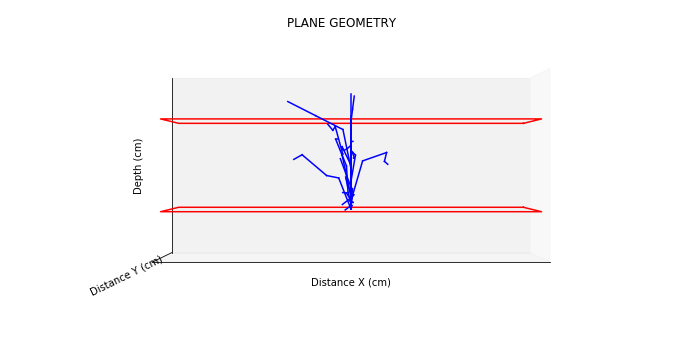

In [7]:
# Run the actual simulation to generate results 
if op2=='t':
    print("")
    print("Plotting tracks of photons")
    
# Data Input
if op2 != 't':
    print("")
    print("Computing ....")
    print("")
    
tic = time.time()
#
NS=0;NT=0;NR=0;NA=0;NM=0;Emin=0.01;  #fix var name syntax error

with open("data.txt") as finp:
    intern = finp.readlines()[10].strip().split()
for i in range(4):
    intern[i]=int(intern[i],10)

Mz=intern[0]
ME=intern[1]
P=intern[2]
B=intern[3]

A1 = np.array(A)
pmol=A1.dot(np.transpose(nam))
N=(rho/pmol)*6.022e23

if geo=='p':
    capaz=np.zeros([1,ME]) 
    Edep=capaz
    Et=capaz
    Er=capaz
else:
    capa=np.zeros([Mz,P])
    Edep=np.zeros([1,ME])
    Et=Edep
    Er=Edep

# 
numtht=np.zeros([1,B]) 
numthr=numtht
time.sleep(2)

if op1=='g':
    if geo=='p': # 
        NT,NS,NR,NA,nfot = monfgp.monfgp(H,nfot,d,opt,op2, Rmin, rf, geoh, E0, ZA, N, nam, mat ,pmol, faZ, b0, b1, b2, NS, Emin,NT,NR,NM,NA)  # PLANE PARALLEL LAYER -- GRÁFICAL MODE /P
    else:
        NT,NS,NR,NA,nfot = monfgc.monfgc(H,nfot,d,opt,op2, Rmin, rf, geoh, E0, ZA, N, nam, mat ,pmol, faZ, b0, b1, b2, NS, Emin,NT,NR,NM,NA,R)  # CYLINDER -- GRÁFICAL MODE /C
else:
    if geo=='p':
        NT,NS,NR,NA,nfot = monfsgp.monfsgp(H,nfot,d,opt,op2, Rmin, rf, geoh, E0, ZA, N, nam, mat ,pmol, faZ, b0, b1, b2, NS, Emin,NT,NR,NM,NA,ME,Edep,Et,B,numtht, Er, numthr)  # PLANE PARALLEL LAYER -- ONLY CALCULATIONS /P # Make function for this
    else:
        NT,NS,NR,NA,nfot = monfsgc.monfsgc(H,nfot,d,opt,op2, Rmin, rf, geoh, E0, ZA, N, nam, mat ,pmol, faZ, b0, b1, b2, NS, Emin,NT,NR,NM,NA,R)  # CYLINDER -- ONLY CALCULATIONS /C  # Make function for this

# RESULTS DISPLAY

toc=time.time()
T=toc-tic

print("Simulation is over")
print("\nAverage values:")
print("\n")
if geo=='p':
    cftr=(NT+NS)/nfot
    cfref=NR/nfot
    cfabs=NA/nfot
    print("Transmission coefficient: ",cftr)
    print("Backscattering coefficient: ",cfref)
    print("absorption coefficient: ",cfabs)
    print("")
    print("Fraction of photons leaving the medium without interacting: ",NS/nfot)
    print("Fraction of photons which suffer more than one interaction: ",NM/nfot)
else:
    cfabs=NA/nfot
    print("absorption coefficient: ",cfabs)
    print("")
    print("Fraction of photons which suffer more than one interaction: ",NM/nfot)

if op1=='sg':
    print("Computing time / input photon(mseg) = ",T*1000/nfot)
    print("")

# Recording of files and plots

print(" ")
print("FILES AND PLOTS")
print("  ")
#
dz=H/Mz 
dE=(E0-Emin)/ME 
dA=90/B 
gr=np.pi/180

Mint=math.floor(Mz/5)
m=[1,Mint,2*Mint,3*Mint,4*Mint,5*Mint] 
color=['k' 'b' 'r' 'g' 'c' 'y']

if op1=='sg': 
     # Energy transfered to the medium
     # File: 'Eabs.out' (Transferred energy per unit depth in KeV cm^(-1).
     if geo=='c':
         with open('Dosis.txt','w') as fdosis:
             print("File Dosis.txt Transferred energy vs radius (cm) and depth (cm)")
             xxd1=np.linspace(0.5*dz,H-0.5*dz,Mz)
             #
             dR=R/P
             yyd1 = np.empty((Mz, P))
             xxd2=np.linspace(0.5*dR,R-0.5*dR,P)
             for k in range(P):
                 for r in range(Mz):
                     yyd1[r][k]=(capa[r][k]*1000/(2*np.pi*xxd2[k]*dR*dz))/nfot
             fdosis.write("          ")
             fdosis.write("\n")
             for k in range(Mz):
                 fdosis.write('%.4f ',xxd1(k))
                 for r in range(P): 
                    fdosis.write("%.4f  " % xxd2(r))
                    fdosis.write('%.6f  ' % yyd1(k,r))
                 fdosis.write("\n")
             
     # Graph: 'transferred energy vs radius'
             plt.figure()
             ax5 = plt.axes()
             ax5.set_xlim(0,R)
             print("Plot Dosis.emf transferred energy vs radius at several depths")
             print("colour depth (cm)")
             for k in range(len(m)):
                 xx = np.repeat(xxd2-0.5*dR, 2)[:-1]
                 yy = np.repeat(yyd1[m[k],:], 2)[1:]
                 plt.plot(xx,yy,color(k))
                 #	    plot([xxd2(P)-0.5*dR,R],[yyd1(m(k),P),yyd1(m(k),P)],color(k))
             print("%s        %5.3f \n",color(k),xxd1(m(k)))
             ax5.set_title("transferred energy vs radius at several depths")
             ax5.set_xlabel("Radial distance (cm)")
             ax5.set_ylabel("de/dV (KeV/(phton·cm^3))")
             
     # transferred energy spectrum     
     # File: 'eabs.out'
         with open("Eabs.txt","w") as feabs:
             print(" ")
             print("File Eabs.txt Spectrum of transferred energy (MeV)")
             xxea=np.linspace(0.5*dE+Emin,E0-0.5*dE,ME)
             yyea=(Edep/dE)/nfot
             feabs.write('#.4f \t #.8f \n',[xxea,yyea])
        
     # Graph: 'eabs'   
         plt.figure()
         ax0 = plt.axes()
         ax0.set_xlim(Emin,E0)
         xx = np.repeat(xxea-0.5*dE, 2)[:-1]
         yy = np.repeat(yyea, 2)[1:]        
         plt.plot(xx,yy,"b")
         plt.plot([xxea(ME)-0.5*dE,E0],[yyea(ME),yyea(ME)],"b")
         ax0.set_title("Spectrum of transferred energy")
         ax0.set_xlabel("Energy (MeV)")
         ax0.set_ylabel("dn/dE (MeV^ (-1))")
         print("Plot Eabs.emf Spectrum of the transferred energy") 
         plt.savefig('eabs.png')
        
     if geo=='p':
             
     # Energy distribution 
     # File: 'etrans.out'
         with open("Etrans.txt","w") as fetrans:
             xxet=np.linspace(0.5*dE+Emin,E0-0.5*dE,ME)
             yyet=(Et/dE)/nfot
             for i in range(len(xxet)):
                 xxet1 = xxet[i]
                 yyet1 = yyet[0][i]
                 fetrans.write("%f\t%f\n" % (xxet1,yyet1))
             print("File Etrans.txt Energy spectrum (MeV) of transmitted photons")
        
     # Plot: 'etrans'
         plt.figure()
         ax1 = plt.axes()
         ax1.set_xlim(Emin,E0)
         xx = np.repeat(xxet-0.5*dE, 2)[:-1]
         yy = np.repeat(yyet, 2)[1:]
         plt.plot(xx,yy,"b")
         plt.plot([xxet[ME-1]-0.5*dE,E0],[yyet[0][ME-1],yyet[0][ME-1]],"b")   
         ax1.set_title("Energy distribution of trasmitted photons")
         ax1.set_xlabel("Energy (MeV)")
         ax1.set_ylabel("dn/dE (MeV^ (-1))")
         print("Plot Etrans Energy spectrum (MeV) of transmitted photons") 
         plt.savefig('etrans')
     
     # Energy distribution of backscattered photons 
     # File: 'erefle.out'
         with open("Eretro.txt","w") as ferefle:
             xxer=np.linspace(0.5*dE+Emin,E0-0.5*dE,ME)
             yyer=(Er/dE)/nfot
             for i in range(len(xxer)):
                 xxer1 = xxer[i]
                 yyer1 = yyer[0][i]
                 ferefle.write("%f\t%f\n" % (xxer1,yyer1))
             ferefle.write(" ")
             print("File Eretro.out Energy distribution (MeV) of backscattered photons")  
        
     # Graph: 'Eretro'  
         plt.figure()       
         ax2 = plt.axes()
         ax2.set_xlim(Emin,E0)
         xx = np.repeat(xxer-0.5*dE, 2)[:-1]
         yy = np.repeat(yyer, 2)[1:]
         plt.plot(xx,yy,"b")
         plt.plot([xxer[ME-1]-0.5*dE,E0],[yyer[0][ME-1],yyer[0][ME-1]],"b")
         ax2.set_title("Energy distribution of backscattered photons")
         ax2.set_xlabel("Energía (MeV)")
         ax2.set_ylabel("dn/dE (MeV^ (-1))")
         print("Grafica Eretro Energy distribution of backscattered photons")
         plt.savefig('Eretro.png')
     
     # Angular distribution of transmited photons 
     # File: 'atrans.out'
         with open("Atrans.out","w") as fatrans:
             xxat=np.linspace(0.5*dA,90-0.5*dA,B)
             yyat=(numtht/(dA*gr*2*np.pi*np.sin(xxat*gr)))/nfot           
             for i in range(len(xxat)):
                 xxat1 = xxat[i]
                 yyat1 = yyat[0][i]
                 fatrans.write("%f\t%f\n" % (xxat1,yyat1))
             fatrans.write(" ")
             print("File Atrans.txt Angle distribution of transmited photons")   
         
     # Graph: 'atrans'
         plt.figure()
         ax3 = plt.axes()
         ax3.set_xlim(0,90)
         xx = np.repeat(xxat-0.5*dA, 2)[:-1]
         yy = np.repeat(yyat, 2)[1:]       
         plt.plot(xx,yy,"b")
         plt.plot([xxat[B-1]-0.5*dA,90],[yyat[0][B-1],yyat[0][B-1]],"b")
         ax3.set_title("Angle distribution of transmited photons")
         ax3.set_xlabel("theta (º)")
         ax3.set_ylabel("dn/dw (str^ (-1))")
         print("Plot Atrans  Angle distribution of transmitted photons")  
         plt.savefig('atrans')
     
     #  Angular distribution of photons 
     #  File: 'aretro.out'
         with open("Aretro.out","w") as farefle:
             xxar=np.linspace(0.5*dA+90,180-0.5*dA,B)	
             yyar=(numthr/(dA*gr*2*np.pi*np.sin(xxar*gr)))/nfot
             for i in range(len(xxar)):
                 xxar1 = xxar[i]
                 yyar1 = yyar[0][i]
                 farefle.write("%f\t%f\n" % (xxar1,yyar1))
             farefle.write(" ")
             print("File Aretro.out Angle distribution of backscattered photons")   
        
     # Graph: 'aretro'                  
         plt.figure()
         ax4 = plt.axes()
         ax4.set_xlim(90,180)
         yyar=(numthr/(dA*gr*2*np.pi*np.sin(xxar*gr)))/nfot         
         xx = np.repeat(xxar-0.5*dA, 2)[:-1]
         yy = np.repeat(yyar, 2)[1:]          
         plt.plot(xx,yy,"b")
         plt.plot([xxar[B-1]-0.5*dA,180],[yyar[0][B-1],yyar[0][B-1]],"b")
         ax4.set_title("Angle distribution of backscattered photons")
         ax4.set_xlabel("theta (º)")
         ax4.set_ylabel("dn/dw (str^ (-1))")
         print("Plot Aretro Angle distribution of backscattered photons")
         plt.savefig('aretro.png')